In [1]:
import numpy as np

# Advanced Indexing (Fancy Indexing)

In [2]:
a = np.array([12, 34, 56, 78, 90])
a

array([12, 34, 56, 78, 90])

## Advanced Indexing: Integers
Advanced inexing can be triggered by using a list or an array while idexing:

In [3]:
a[[0, 3, 4]]

array([12, 78, 90])

In [4]:
# the same:
take = [0, 3, 4]
a[take]

array([12, 78, 90])

In [5]:
take = np.array([0, 3, 4])
a[take]

array([12, 78, 90])

The same index value can bu used more than once, to construct a new array in the same shape as the supplied list:

In [6]:
a[[0, 1, 0, 2]]

array([12, 34, 12, 56])

In [7]:
take = np.array([2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 4])
print(take.shape)
print(a[take])
print(a[take].shape)

(12,)
[56 12 34 12 34 34 34 34 12 56 12 90]
(12,)


This works with multidimensional arrays as well!

In [8]:
take2 = np.array([
    [0, 1, 0], 
    [1, 2, 1], 
    [0, 1, 0],
])
a[take2]

array([[12, 34, 12],
       [34, 56, 34],
       [12, 34, 12]])

Note: the examples above used a 1-d list or an array to trigger advanced indexing.
Advanced indxing can be triggered even with a tuple for any axis containing a sequence:

In [9]:
take2 = ([[0, 1], [2, 1]],)
a[take2]

array([[12, 34],
       [56, 34]])

Important! In contrary to slices, fancy indexing always returns a COPY (and not a view) of the array:

In [10]:
a[1:3].flags['OWNDATA']

False

In [11]:
a[[1,3]].flags['OWNDATA']

True

## Fancy Indexing on Multi Dimensionsnal arrays

In [12]:
b = np.arange(50).reshape(5, -1) * 10
b

array([[  0,  10,  20,  30,  40,  50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140, 150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240, 250, 260, 270, 280, 290],
       [300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
       [400, 410, 420, 430, 440, 450, 460, 470, 480, 490]])

In [13]:
b[1, 3]

130

In [14]:
b[2, 5]

250

In [15]:
b[2, 6]

260

To use fancy indexing to get items at indexes [1,3] and [2,5] and [2,6], values should be specified for each axis independently:

In [16]:
b[[1, 2, 2], [3, 5, 6]]

array([130, 250, 260])

## Bonus: Advanced Fancy Indexing
Let's say we want to get the data from rows 1,2,3 and columns 1,2,5,6,8:

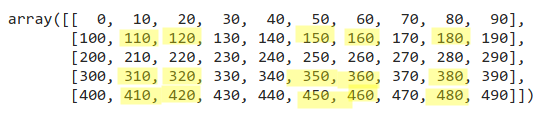

This will not work:

In [17]:
b[[1,2,3], [1,2,5,6,8]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (5,) 

This shortcut works, but it's considered complicated:

In [18]:
b[[1,2,3]][:,[1,2,5,6,8]]

array([[110, 120, 150, 160, 180],
       [210, 220, 250, 260, 280],
       [310, 320, 350, 360, 380]])

Instead it is more common to use `np.ix_`:

In [19]:
np.ix_([1,2,3], [1,2,5,6,8])

(array([[1],
        [2],
        [3]]),
 array([[1, 2, 5, 6, 8]]))

This result looks strange - but it can be used to fancy select across axes:

In [20]:
b[np.ix_([1,2,3], [1,2,5,6,8])]

array([[110, 120, 150, 160, 180],
       [210, 220, 250, 260, 280],
       [310, 320, 350, 360, 380]])